In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from gensim.models import Word2Vec, KeyedVectors
from mol2vec.features import mol2alt_sentence

# Load dataset
df = pd.read_csv("data.csv")

# Load Pretrained Mol2Vec Model
model = Word2Vec.load("model_300dim.pkl")  # Load Full Word2Vec Model
model = model.wv  # Convert to KeyedVectors for fast lookup ✅

# Function to Convert SMILES to Mol2Vec Embeddings
def smiles_to_mol2vec(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        sentence = mol2alt_sentence(mol, radius=1)  # Convert molecule to sentence
        vectors = [model[word] for word in sentence if word in model]  # Get word vectors
        vector = np.mean(vectors, axis=0) if vectors else np.zeros(300)  # Average vectors
        return vector.tolist()  # Convert to list for Pandas
    else:
        return [0] * 300  # Return zero vector for invalid SMILES

# Convert SMILES for Drug_A and Drug_B
df['Mol2Vec_A'] = df['CanonicalSMILES_A'].apply(smiles_to_mol2vec)
df['Mol2Vec_B'] = df['CanonicalSMILES_B'].apply(smiles_to_mol2vec)

# Convert Lists into Separate Columns
mol2vec_A_df = pd.DataFrame(df['Mol2Vec_A'].to_list(), columns=[f'Mol2Vec_A_{i}' for i in range(300)])
mol2vec_B_df = pd.DataFrame(df['Mol2Vec_B'].to_list(), columns=[f'Mol2Vec_B_{i}' for i in range(300)])

# Merge New Features into Original Data
df = pd.concat([df, mol2vec_A_df, mol2vec_B_df], axis=1).drop(columns=['Mol2Vec_A', 'Mol2Vec_B'])

# Save Processed Dataset
df.to_csv("data_mol2vec.csv", index=False)

print("✅ Mol2Vec Conversion Completed. Saved as 'data_mol2vec.csv'")
print(df.head())


✅ Mol2Vec Conversion Completed. Saved as 'data_mol2vec.csv'
          Drug_A  MolecularWeight_A  XLogP_A  TPSA_A  Charge_A  \
0     Naltrexone             341.40      1.9    70.0       0.0   
1     Aprepitant             534.40      4.2    75.2       0.0   
2     Cimetidine             252.34      0.4   114.0       0.0   
3   Clotrimazole             344.80      5.0    17.8       0.0   
4  Dexamethasone             392.50      1.9    94.8       0.0   

   HBondDonorCount_A  HBondAcceptorCount_A  RotatableBondCount_A  Volume3D_A  \
0                2.0                   5.0                   2.0       252.3   
1                2.0                  12.0                   6.0       369.7   
2                3.0                   4.0                   7.0       196.4   
3                0.0                   1.0                   4.0       265.5   
4                3.0                   6.0                   2.0       295.4   

                                   CanonicalSMILES_A  ... Mol2

In [ ]:
df=pd.read_csv("data_mol2vec.csv")


In [ ]:
pip install transformers torch rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install --upgrade --force-reinstall numpy


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from rdkit import Chem
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Load ChemBERTa Model and Tokenizer
tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
model = AutoModel.from_pretrained("DeepChem/ChemBERTa-77M-MTR")

# ✅ Function to Convert SMILES to ChemBERTa Embeddings
def smiles_to_chemberta(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        inputs = tokenizer(smiles, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)
        return outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # Extract CLS token
    else:
        return np.zeros(384)  # Return zero vector if invalid SMILES

# ✅ Load Dataset
df = pd.read_csv("data.csv")  # Change this to your file path

# ✅ Apply ChemBERTa Transformation for Both Drugs
df['ChemBERTa_A'] = df['CanonicalSMILES_A'].apply(smiles_to_chemberta)
df['ChemBERTa_B'] = df['CanonicalSMILES_B'].apply(smiles_to_chemberta)

# ✅ Convert List to Columns for Drug A
vector_length_A = len(df['ChemBERTa_A'][0])  # Detect correct embedding size (should be 384)
chemberta_df_A = pd.DataFrame(df['ChemBERTa_A'].to_list(), columns=[f'ChemBERTa_A_{i}' for i in range(vector_length_A)])

# ✅ Convert List to Columns for Drug B
vector_length_B = len(df['ChemBERTa_B'][0])
chemberta_df_B = pd.DataFrame(df['ChemBERTa_B'].to_list(), columns=[f'ChemBERTa_B_{i}' for i in range(vector_length_B)])

# ✅ Merge with Original Data
df = pd.concat([df, chemberta_df_A, chemberta_df_B], axis=1).drop(columns=['ChemBERTa_A', 'ChemBERTa_B'])

# ✅ Save Processed Dataset
df.to_csv("processed_data_chemberta.csv", index=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "data.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Drop SMILES columns
columns_to_drop = ["CanonicalSMILES_A", "IsomericSMILES_A", "CanonicalSMILES_B", "IsomericSMILES_B"]
df = df.drop(columns=columns_to_drop, errors="ignore")

# Split features and target variable
X = df.drop(columns=["Level"])  # Assuming 'Level' is the target variable
y = df["Level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")


ValueError: could not convert string to float: 'Sibutramine'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("data_mol2vec.csv")  # Replace with actual file path

# Drop SMILES columns
df = df.drop(columns=["CanonicalSMILES_A", "CanonicalSMILES_B", "IsomericSMILES_A", "IsomericSMILES_B"], errors='ignore')

# Label Encoding for Drug_A and Drug_B
encoder = LabelEncoder()
all_drugs = pd.concat([df['Drug_A'], df['Drug_B']]).unique()
encoder.fit(all_drugs)
df['Drug_A'] = encoder.transform(df['Drug_A'])
df['Drug_B'] = encoder.transform(df['Drug_B'])

# Splitting Features and Target
X = df.drop(columns=["Level"])  # Features
y = df["Level"]  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8000
Classification Report:
               precision    recall  f1-score   support

       Major       0.50      0.29      0.36         7
       Minor       0.67      0.50      0.57         4
    Moderate       0.84      0.92      0.88        39

    accuracy                           0.80        50
   macro avg       0.67      0.57      0.60        50
weighted avg       0.78      0.80      0.78        50



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("data_mol2vec.csv")

# Drop SMILES columns
df = df.drop(columns=["CanonicalSMILES_A", "CanonicalSMILES_B", "IsomericSMILES_A", "IsomericSMILES_B"], errors='ignore')

# Label Encode Drug Names
le = LabelEncoder()
all_drugs = pd.concat([df["Drug_A"], df["Drug_B"]]).unique()
le.fit(all_drugs)

df["Drug_A"] = le.transform(df["Drug_A"])
df["Drug_B"] = le.transform(df["Drug_B"])

# Define Features & Target
X = df.drop(columns=["Level"])
y = df["Level"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Numeric Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to Compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

# Train & Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Random Forest Accuracy: 0.8392
              precision    recall  f1-score   support

           0       1.00      0.24      0.38        21
           1       0.82      0.39      0.53        23
           2       0.84      0.99      0.91       155

    accuracy                           0.84       199
   macro avg       0.88      0.54      0.61       199
weighted avg       0.85      0.84      0.81       199



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:12:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.8191
              precision    recall  f1-score   support

           0       0.50      0.24      0.32        21
           1       0.69      0.48      0.56        23
           2       0.85      0.95      0.90       155

    accuracy                           0.82       199
   macro avg       0.68      0.55      0.59       199
weighted avg       0.79      0.82      0.80       199

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91263


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of data points in the train set: 793, number of used features: 617
[LightGBM] [Info] Start training from score -2.256983
[LightGBM] [Info] Start training from score -2.132528
[LightGBM] [Info] Start training from score -0.252576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LightGBM Accuracy: 0.8392
              precision    recall  f1-score   support

           0       0.75      0.29      0.41        21
           1       0.79      0.48      0.59        23
           2       0.85      0.97      0.90       155

    accuracy                           0.84       199
   macro avg       0.79      0.58      0.64       199
weighted avg      

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, rdFingerprintGenerator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

# Suppress RDKit warnings
warnings.filterwarnings("ignore", category=UserWarning)

print("RDKit Version:", rdkit.__version__)  # Check RDKit version

# Function to convert SMILES to Morgan Fingerprints (Handles RDKit version differences)
def smiles_to_fp(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        if hasattr(rdFingerprintGenerator, "GetMorganGenerator"):
            # New RDKit method
            generator = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=nBits)
            fp = generator.GetFingerprint(mol)
        else:
            # Old RDKit method
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)

        arr = np.zeros((nBits,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        return arr
    else:
        return np.zeros((nBits,))

# Load dataset (Ensure 'data.csv' is in the same directory)
df = pd.read_csv('data.csv')

# Convert SMILES to Fingerprints
df['FP_A'] = df['CanonicalSMILES_A'].apply(smiles_to_fp)
df['FP_B'] = df['CanonicalSMILES_B'].apply(smiles_to_fp)

# Combine Features (Concatenation, Difference, and Product of Fingerprints)
def combine_features(fp1, fp2):
    return np.concatenate((fp1, fp2, np.abs(fp1 - fp2), fp1 * fp2))

df['Features'] = df.apply(lambda row: combine_features(row['FP_A'], row['FP_B']), axis=1)

# Prepare data
X = np.vstack(df['Features'])
y = df['Level'].astype('category').cat.codes  # Convert categorical labels to numerical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=200),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NaiveBayes': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(max_depth=10),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200)
}

# Train & Evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted'),
        'ROC-AUC': roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None and y_prob.shape[1] > 1 else 'N/A'
    }
    print(results)

# Print results
results_df = pd.DataFrame(results).T
print("\n🔹 **Model Performance Metrics** 🔹")
print(results_df)

# Save results to CSV
results_df.to_csv('ddi_results.csv', index=True)
print("\n✅ Results saved as 'ddi_results.csv'")


RDKit Version: 2024.09.6
Training RandomForest...
{'RandomForest': {'Accuracy': 0.9063011456628478, 'Precision': 0.9067022847448764, 'Recall': 0.9063011456628478, 'F1-score': 0.8984547099594417, 'ROC-AUC': 0.9560186564640724}}
Training XGBoost...
{'RandomForest': {'Accuracy': 0.9063011456628478, 'Precision': 0.9067022847448764, 'Recall': 0.9063011456628478, 'F1-score': 0.8984547099594417, 'ROC-AUC': 0.9560186564640724}, 'XGBoost': {'Accuracy': 0.9054828150572831, 'Precision': 0.9040000503942592, 'Recall': 0.9054828150572831, 'F1-score': 0.8982831636194711, 'ROC-AUC': 0.9583665696217519}}
Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.123814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10844
[LightGBM] [Info] Number of data points in the train set: 9775, number of used features: 5422
[LightGBM] [Info] Start training from score -2.011329
[LightGBM] [Info] Start training from score -2.666962
[LightGBM] [Info] Start training from score -0.227244


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


{'RandomForest': {'Accuracy': 0.9063011456628478, 'Precision': 0.9067022847448764, 'Recall': 0.9063011456628478, 'F1-score': 0.8984547099594417, 'ROC-AUC': 0.9560186564640724}, 'XGBoost': {'Accuracy': 0.9054828150572831, 'Precision': 0.9040000503942592, 'Recall': 0.9054828150572831, 'F1-score': 0.8982831636194711, 'ROC-AUC': 0.9583665696217519}, 'LightGBM': {'Accuracy': 0.9095744680851063, 'Precision': 0.9072786109853935, 'Recall': 0.9095744680851063, 'F1-score': 0.903807525721111, 'ROC-AUC': 0.9623270804320773}}
Training CatBoost...
{'RandomForest': {'Accuracy': 0.9063011456628478, 'Precision': 0.9067022847448764, 'Recall': 0.9063011456628478, 'F1-score': 0.8984547099594417, 'ROC-AUC': 0.9560186564640724}, 'XGBoost': {'Accuracy': 0.9054828150572831, 'Precision': 0.9040000503942592, 'Recall': 0.9054828150572831, 'F1-score': 0.8982831636194711, 'ROC-AUC': 0.9583665696217519}, 'LightGBM': {'Accuracy': 0.9095744680851063, 'Precision': 0.9072786109853935, 'Recall': 0.9095744680851063, 'F1-

RandomForest Accuracy: 0.8830


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:08:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8867
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1726
[LightGBM] [Info] Number of data points in the train set: 9775, number of used features: 16
[LightGBM] [Info] Start training from score -2.011329
[LightGBM] [Info] Start training from score -2.666962
[LightGBM] [Info] Start training from score -0.227244
LightGBM Accuracy: 0.8797
CatBoost Accuracy: 0.8822


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7975


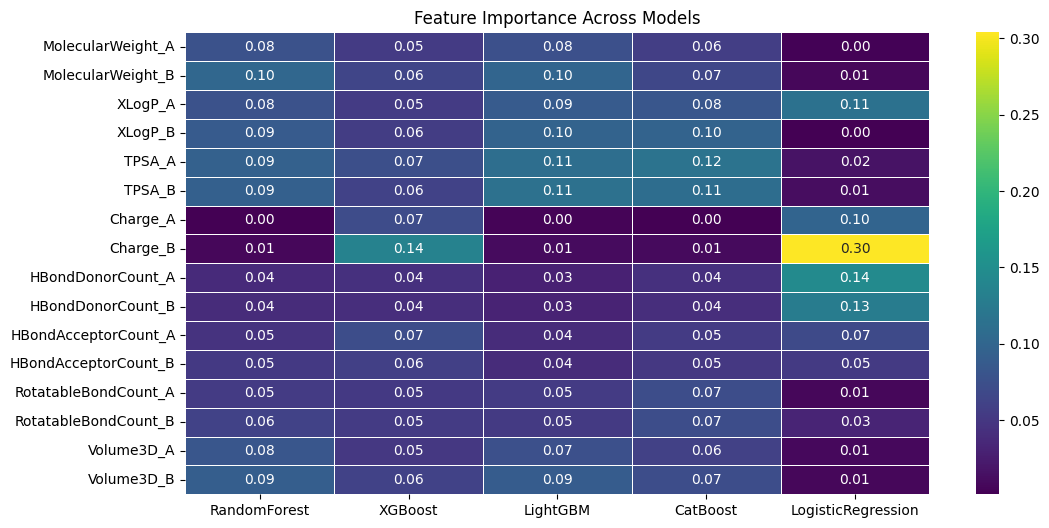

 99%|===================| 7290/7332 [02:09<00:00]       

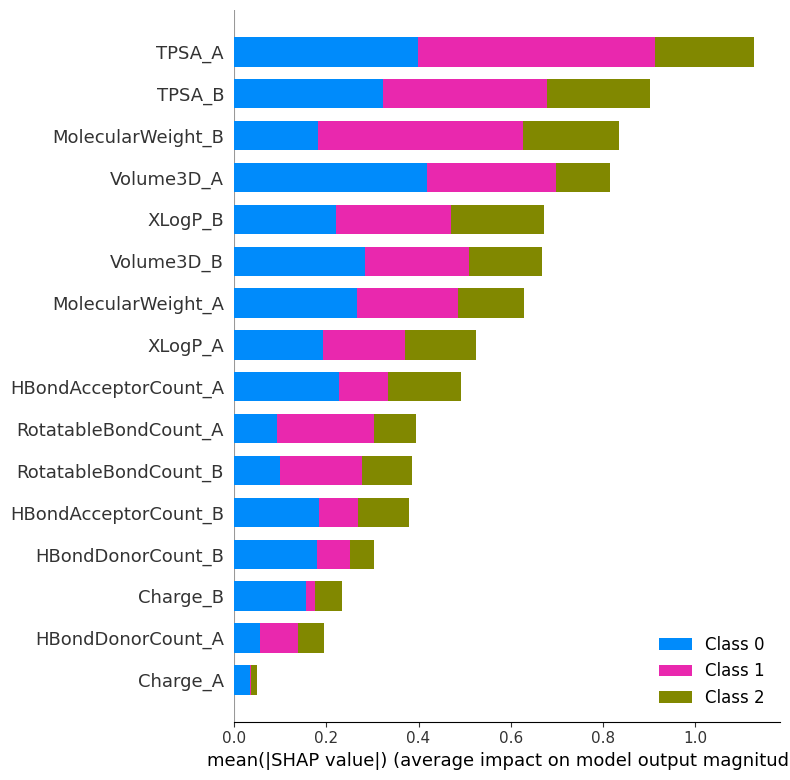

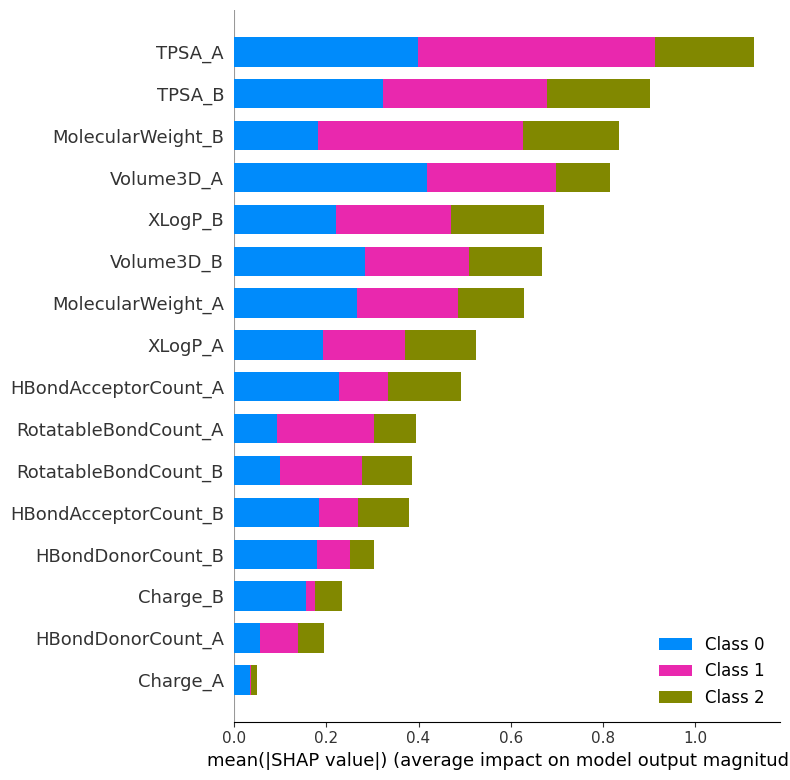


Selected Features for Hybrid Model: ['Charge_B', 'TPSA_A', 'TPSA_B', 'MolecularWeight_B']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 9775, number of used features: 4
[LightGBM] [Info] Start training from score -2.011329
[LightGBM] [Info] Start training from score -2.666962
[LightGBM] [Info] Start training from score -0.227244

✅ Hybrid Model Accuracy: 0.8474


In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('data.csv')

# Features and target variable
feature_cols = [
    'MolecularWeight_A', 'MolecularWeight_B', 'XLogP_A', 'XLogP_B', 'TPSA_A', 'TPSA_B',
    'Charge_A', 'Charge_B', 'HBondDonorCount_A', 'HBondDonorCount_B', 'HBondAcceptorCount_A', 'HBondAcceptorCount_B',
    'RotatableBondCount_A', 'RotatableBondCount_B', 'Volume3D_A', 'Volume3D_B'
]

X = df[feature_cols]
y = df['Level'].astype('category').cat.codes

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train Models and Extract Feature Importance
feature_importance_df = pd.DataFrame(index=feature_cols)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if hasattr(model, 'feature_importances_'):  # Tree-based models
        feature_importance_df[name] = model.feature_importances_
    elif hasattr(model, 'coef_'):  # Logistic Regression
        feature_importance_df[name] = np.abs(model.coef_[0])  # Absolute values of coefficients

    print(f"{name} Accuracy: {accuracy:.4f}")

# Normalize Feature Importance for Better Comparison
feature_importance_df = feature_importance_df.div(feature_importance_df.sum(axis=0), axis=1)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.heatmap(feature_importance_df, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Importance Across Models")
plt.show()

# SHAP Analysis (for XGBoost)
explainer = shap.Explainer(models['XGBoost'], X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

# SHAP Bar Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Hybrid Model: Use Top Features per Model
top_features_per_model = feature_importance_df.idxmax(axis=0)
selected_features = list(set(top_features_per_model.values))
print("\nSelected Features for Hybrid Model:", selected_features)

X_hybrid = df[selected_features]
X_train_hybrid, X_test_hybrid, y_train, y_test = train_test_split(X_hybrid, y, test_size=0.2, random_state=42, stratify=y)

# Hybrid Model: Train with Best Models & Selected Features
hybrid_model = LGBMClassifier(random_state=42)
hybrid_model.fit(X_train_hybrid, y_train)
y_pred_hybrid = hybrid_model.predict(X_test_hybrid)
hybrid_accuracy = accuracy_score(y_test, y_pred_hybrid)

print(f"\n✅ Hybrid Model Accuracy: {hybrid_accuracy:.4f}")



✅ Model Accuracy: 0.9083


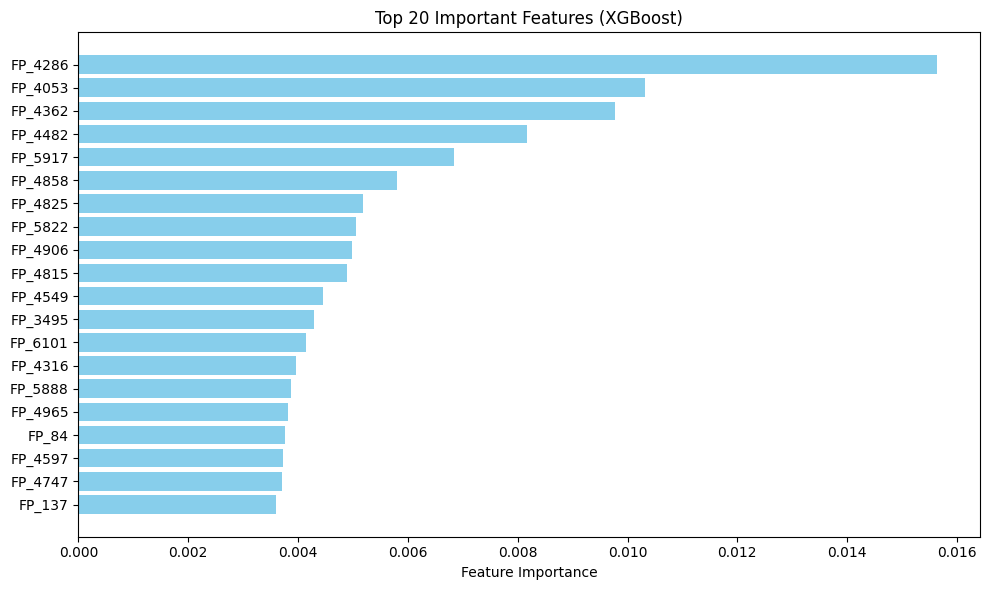

 99%|===================| 7263/7332 [01:38<00:00]       

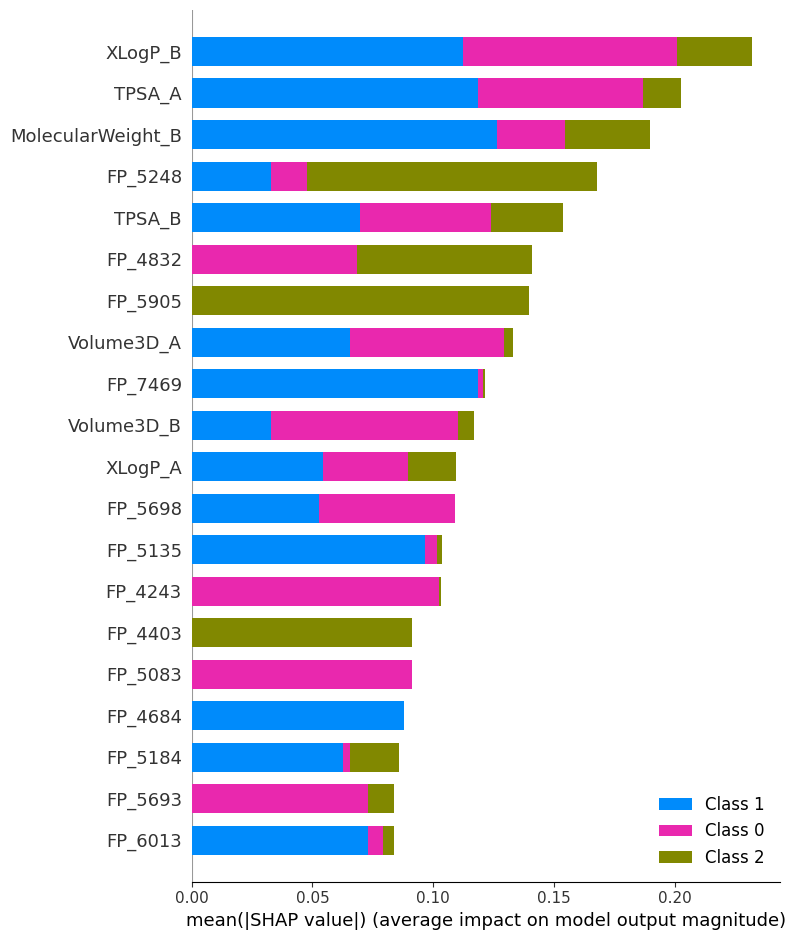

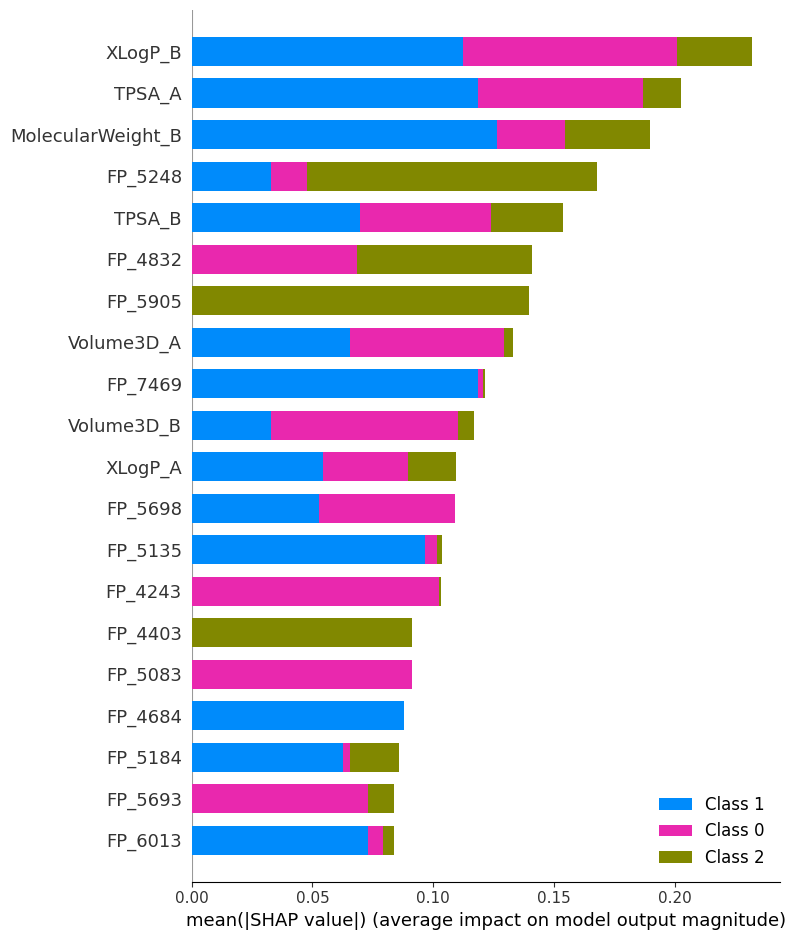

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import warnings
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, rdFingerprintGenerator
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore")

# Function to convert SMILES to Morgan Fingerprints
def smiles_to_fp(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        if hasattr(rdFingerprintGenerator, "GetMorganGenerator"):
            generator = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=nBits)
            fp = generator.GetFingerprint(mol)
        else:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
        arr = np.zeros((nBits,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        return arr
    else:
        return np.zeros((nBits,))

# Load dataset
df = pd.read_csv('data.csv')

# Generate fingerprints
df['FP_A'] = df['CanonicalSMILES_A'].apply(smiles_to_fp)
df['FP_B'] = df['CanonicalSMILES_B'].apply(smiles_to_fp)

# Combine fingerprints
def combine_features(fp1, fp2):
    return np.concatenate((fp1, fp2, np.abs(fp1 - fp2), fp1 * fp2))

df['FingerprintFeatures'] = df.apply(lambda row: combine_features(row['FP_A'], row['FP_B']), axis=1)
fp_features = np.vstack(df['FingerprintFeatures'])

# Physicochemical properties
physicochem_props = [
    'MolecularWeight_A', 'MolecularWeight_B',
    'XLogP_A', 'XLogP_B',
    'TPSA_A', 'TPSA_B',
    'Charge_A', 'Charge_B',
    'HBondDonorCount_A', 'HBondDonorCount_B',
    'HBondAcceptorCount_A', 'HBondAcceptorCount_B',
    'RotatableBondCount_A', 'RotatableBondCount_B',
    'Volume3D_A', 'Volume3D_B'
]
physico_features = df[physicochem_props].values

# Final input features
X = np.hstack((fp_features, physico_features))
y = df['Level'].astype('category').cat.codes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.4f}")

# Feature Importance
importances = model.feature_importances_
fp_feature_names = [f'FP_{i}' for i in range(fp_features.shape[1])]
all_feature_names = fp_feature_names + physicochem_props

top_n = 20
feat_imp_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(top_n)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features (XGBoost)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# SHAP
explainer = shap.Explainer(model, X_train, feature_names=all_feature_names)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=all_feature_names)
shap.summary_plot(shap_values, X_test, feature_names=all_feature_names, plot_type="bar")


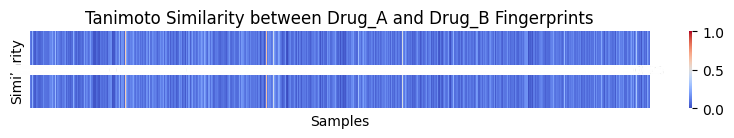

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, rdFingerprintGenerator

# Function to convert SMILES to Morgan Fingerprints (using MorganGenerator)
def smiles_to_fp(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Using rdFingerprintGenerator for fingerprint calculation
        generator = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=nBits)
        fp = generator.GetFingerprint(mol)  # This generates a SparseBitVect
        return fp
    else:
        return None  # If molecule is invalid, return None

# Load dataset (replace with the actual path to your dataset)
df = pd.read_csv('data.csv')  # Replace 'data.csv' with your actual dataset file

# Generate fingerprints for both Drug_A and Drug_B (as SparseBitVect)
df['FP_A'] = df['CanonicalSMILES_A'].apply(smiles_to_fp)
df['FP_B'] = df['CanonicalSMILES_B'].apply(smiles_to_fp)

# Calculate Tanimoto similarity between the fingerprints of Drug_A and Drug_B
def tanimoto_similarity(fp1, fp2):
    if fp1 is not None and fp2 is not None:
        return DataStructs.TanimotoSimilarity(fp1, fp2)
    else:
        return 0  # If any fingerprint is None, return similarity as 0

# Calculate similarity for each row in the dataset
similarities = df.apply(lambda row: tanimoto_similarity(row['FP_A'], row['FP_B']), axis=1)

# Reshape similarities for heatmap visualization (creating a 2D array)
similarity_matrix = np.reshape(similarities.values, (1, -1))

# Visualize the similarity matrix as a heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Tanimoto Similarity between Drug_A and Drug_B Fingerprints")
plt.xlabel("Samples")
plt.ylabel("Similarity")
plt.show()


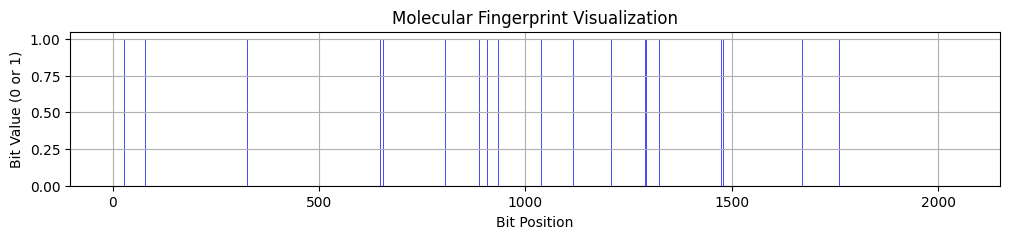

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, rdFingerprintGenerator

# Function to convert SMILES to Morgan Fingerprints (using MorganGenerator)
def smiles_to_fp(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Using rdFingerprintGenerator for fingerprint calculation
        generator = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=nBits)
        fp = generator.GetFingerprint(mol)  # This generates a SparseBitVect
        return fp
    else:
        return None  # If molecule is invalid, return None

# Load dataset (replace with the actual path to your dataset)
df = pd.read_csv('data.csv')  # Replace 'data.csv' with your actual dataset file

# Generate fingerprints for both Drug_A and Drug_B (as SparseBitVect)
df['FP_A'] = df['CanonicalSMILES_A'].apply(smiles_to_fp)
df['FP_B'] = df['CanonicalSMILES_B'].apply(smiles_to_fp)

# Function to visualize the fingerprint as a binary vector
def plot_fingerprint(fp, nBits=2048):
    if fp is not None:
        # Convert fingerprint to numpy array
        arr = np.zeros((nBits,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)

        # Create a bar plot for the fingerprint
        plt.figure(figsize=(12, 2))
        plt.bar(range(nBits), arr, width=1.0, color='blue', alpha=0.7)
        plt.title("Molecular Fingerprint Visualization")
        plt.xlabel("Bit Position")
        plt.ylabel("Bit Value (0 or 1)")
        plt.grid(True)
        plt.show()
    else:
        print("Invalid molecule, no fingerprint available.")

# Select a sample molecule from the dataset
sample_smiles = df['CanonicalSMILES_A'].iloc[0]  # You can choose any SMILES string from your dataset
sample_fp = smiles_to_fp(sample_smiles)

# Plot the fingerprint for the sample molecule
plot_fingerprint(sample_fp)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import plotly.graph_objects as go

# Function to convert SMILES to Fingerprints
def smiles_to_fp(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
        return fp
    else:
        return None

# Convert fingerprint to a matrix (useful for heatmap visualization)
def fingerprint_to_matrix(fp, nBits=2048):
    arr = np.zeros((nBits,), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr.reshape(1, nBits)  # Reshape to 2D for heatmap

# Sample SMILES
sample_smiles = 'CCO'  # Ethanol as an example, replace with your actual molecule
fp = smiles_to_fp(sample_smiles)

# Convert to matrix
fp_matrix = fingerprint_to_matrix(fp)

# Plot Heatmap using Plotly for interactivity
fig = go.Figure(data=go.Heatmap(
                z=fp_matrix,
                colorscale='Viridis',
                showscale=False,
                zmin=0, zmax=1,
                colorbar=dict(title='Bit Value'),
                hoverongaps=False
))

fig.update_layout(
    title="Molecular Fingerprint Visualization",
    xaxis_title="Fingerprint Bit",
    yaxis_title="Molecule",
)

fig.show()


[03:47:39] DEPRECATION WARNING: please use MorganGenerator


Streaming output truncated to the last 5000 lines.
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:48:36] DEPRECATION WARNING: please use MorganGenerator
[03:4

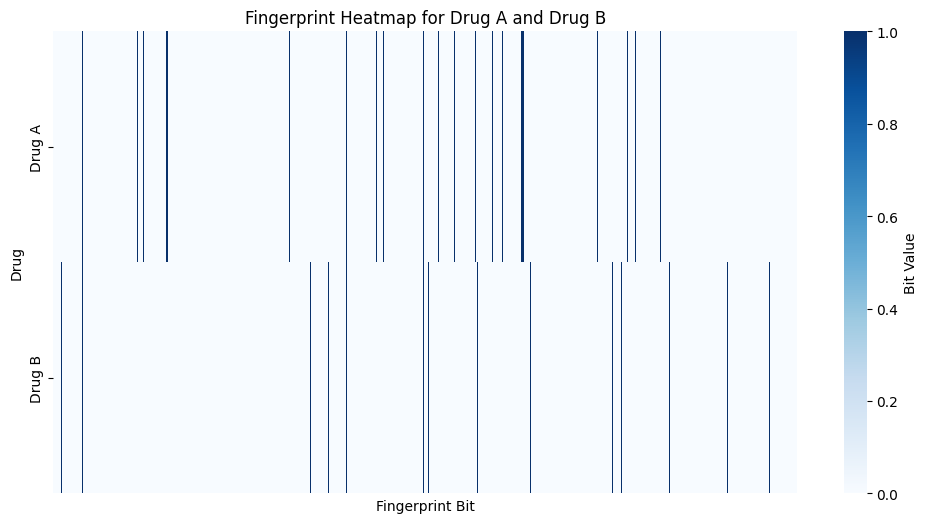

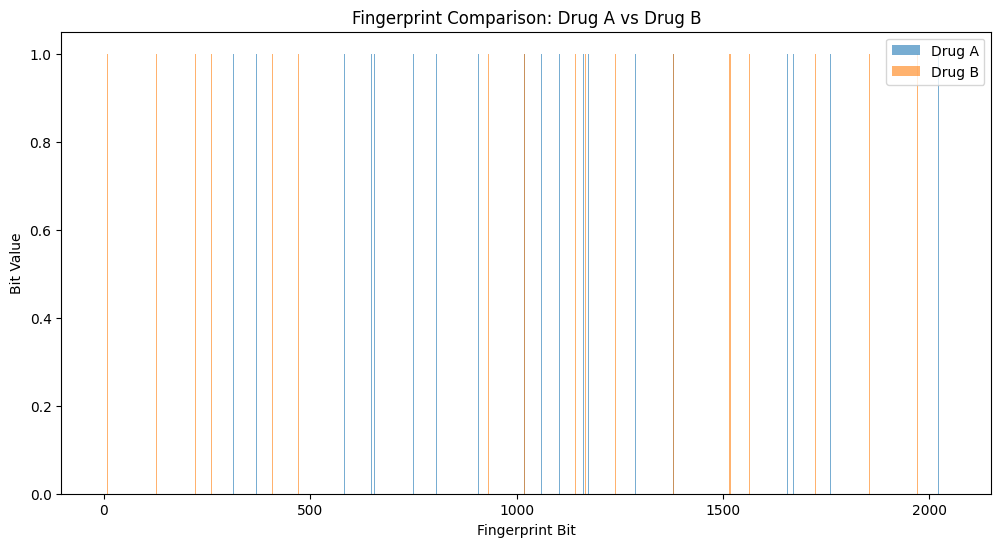

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import plotly.graph_objects as go

# Load dataset (make sure the dataset is in the same directory or provide the full path)
df = pd.read_csv('data.csv')

# Function to convert SMILES to Fingerprints
def smiles_to_fp(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
        return fp
    else:
        return None

# Convert SMILES to Fingerprints for both Drug_A and Drug_B
df['FP_A'] = df['CanonicalSMILES_A'].apply(smiles_to_fp)
df['FP_B'] = df['CanonicalSMILES_B'].apply(smiles_to_fp)

# Convert fingerprints into numpy arrays for heatmap visualization
def fingerprint_to_array(fp, nBits=2048):
    arr = np.zeros((nBits,), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Apply conversion for both drugs
df['FP_A_array'] = df['FP_A'].apply(fingerprint_to_array)
df['FP_B_array'] = df['FP_B'].apply(fingerprint_to_array)

# Now, let's visualize the fingerprints as heatmaps for the first row (or any specific rows)
fingerprint_A = df['FP_A_array'].iloc[0]  # First row
fingerprint_B = df['FP_B_array'].iloc[0]  # First row

# Create a heatmap to show molecular fingerprints
fingerprint_matrix = np.array([fingerprint_A, fingerprint_B])

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(fingerprint_matrix, cmap='Blues', cbar_kws={'label': 'Bit Value'}, xticklabels=False, yticklabels=['Drug A', 'Drug B'])
plt.title('Fingerprint Heatmap for Drug A and Drug B')
plt.xlabel('Fingerprint Bit')
plt.ylabel('Drug')
plt.show()

# Alternatively, you can plot the fingerprints as a bar chart to see individual bits
plt.figure(figsize=(12, 6))
plt.bar(range(len(fingerprint_A)), fingerprint_A, alpha=0.6, label='Drug A')
plt.bar(range(len(fingerprint_B)), fingerprint_B, alpha=0.6, label='Drug B')
plt.xlabel('Fingerprint Bit')
plt.ylabel('Bit Value')
plt.title('Fingerprint Comparison: Drug A vs Drug B')
plt.legend()
plt.show()

# Optional: Create an interactive heatmap using Plotly (for better presentation)
fig = go.Figure(data=go.Heatmap(
                z=fingerprint_matrix,
                colorscale='Viridis',
                showscale=True,
                zmin=0, zmax=1,
                colorbar=dict(title='Bit Value'),
                hoverongaps=False
))

fig.update_layout(
    title="Molecular Fingerprint Visualization for Drug A and Drug B",
    xaxis_title="Fingerprint Bit",
    yaxis_title="Drug"
)

fig.show()


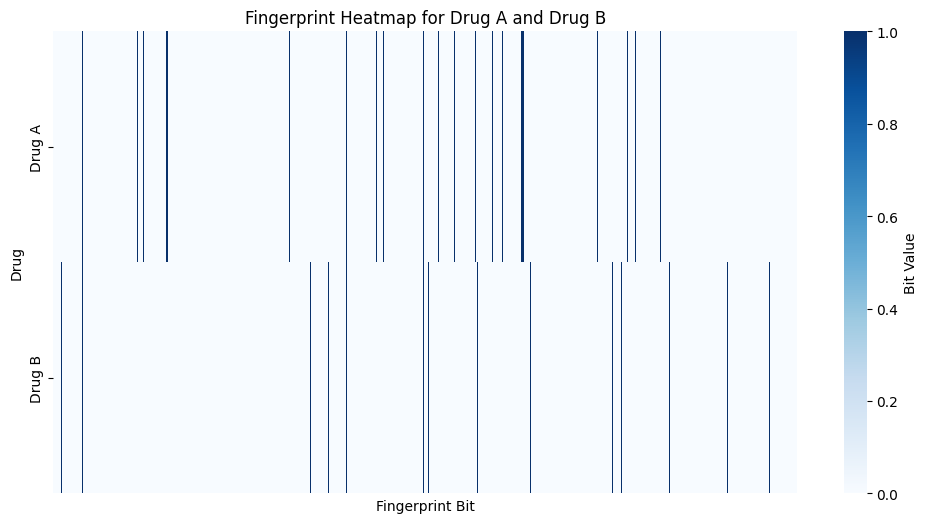

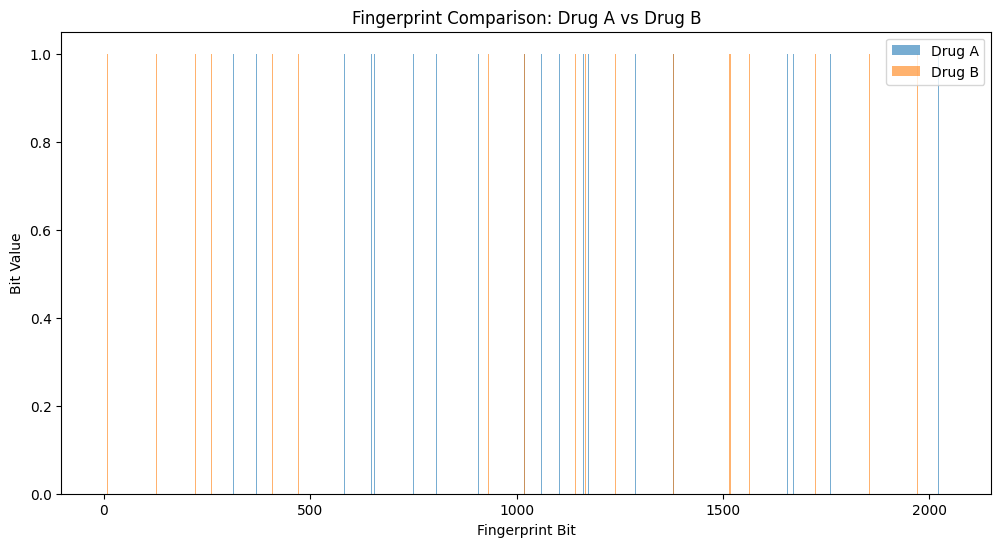

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import plotly.graph_objects as go

# Load dataset (make sure the dataset is in the same directory or provide the full path)
df = pd.read_csv('data.csv')

# Function to convert SMILES to Fingerprints using MorganGenerator (handles RDKit version differences)
def smiles_to_fp(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Using the updated MorganGenerator
        generator = GetMorganGenerator(radius=radius, fpSize=nBits)
        fp = generator.GetFingerprint(mol)
        return fp
    else:
        return None

# Convert SMILES to Fingerprints for both Drug_A and Drug_B
df['FP_A'] = df['CanonicalSMILES_A'].apply(smiles_to_fp)
df['FP_B'] = df['CanonicalSMILES_B'].apply(smiles_to_fp)

# Convert fingerprints into numpy arrays for heatmap visualization
def fingerprint_to_array(fp, nBits=2048):
    arr = np.zeros((nBits,), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Apply conversion for both drugs
df['FP_A_array'] = df['FP_A'].apply(fingerprint_to_array)
df['FP_B_array'] = df['FP_B'].apply(fingerprint_to_array)

# Now, let's visualize the fingerprints as heatmaps for the first row (or any specific rows)
fingerprint_A = df['FP_A_array'].iloc[0]  # First row
fingerprint_B = df['FP_B_array'].iloc[0]  # First row

# Create a heatmap to show molecular fingerprints
fingerprint_matrix = np.array([fingerprint_A, fingerprint_B])

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(fingerprint_matrix, cmap='Blues', cbar_kws={'label': 'Bit Value'}, xticklabels=False, yticklabels=['Drug A', 'Drug B'])
plt.title('Fingerprint Heatmap for Drug A and Drug B')
plt.xlabel('Fingerprint Bit')
plt.ylabel('Drug')
plt.show()

# Alternatively, you can plot the fingerprints as a bar chart to see individual bits
plt.figure(figsize=(12, 6))
plt.bar(range(len(fingerprint_A)), fingerprint_A, alpha=0.6, label='Drug A')
plt.bar(range(len(fingerprint_B)), fingerprint_B, alpha=0.6, label='Drug B')
plt.xlabel('Fingerprint Bit')
plt.ylabel('Bit Value')
plt.title('Fingerprint Comparison: Drug A vs Drug B')
plt.legend()
plt.show()

# Optional: Create an interactive heatmap using Plotly (for better presentation)
fig = go.Figure(data=go.Heatmap(
                z=fingerprint_matrix,
                colorscale='Viridis',
                showscale=True,
                zmin=0, zmax=1,
                colorbar=dict(title='Bit Value'),
                hoverongaps=False
))

fig.update_layout(
    title="Molecular Fingerprint Visualization for Drug A and Drug B",
    xaxis_title="Fingerprint Bit",
    yaxis_title="Drug"
)

fig.show()


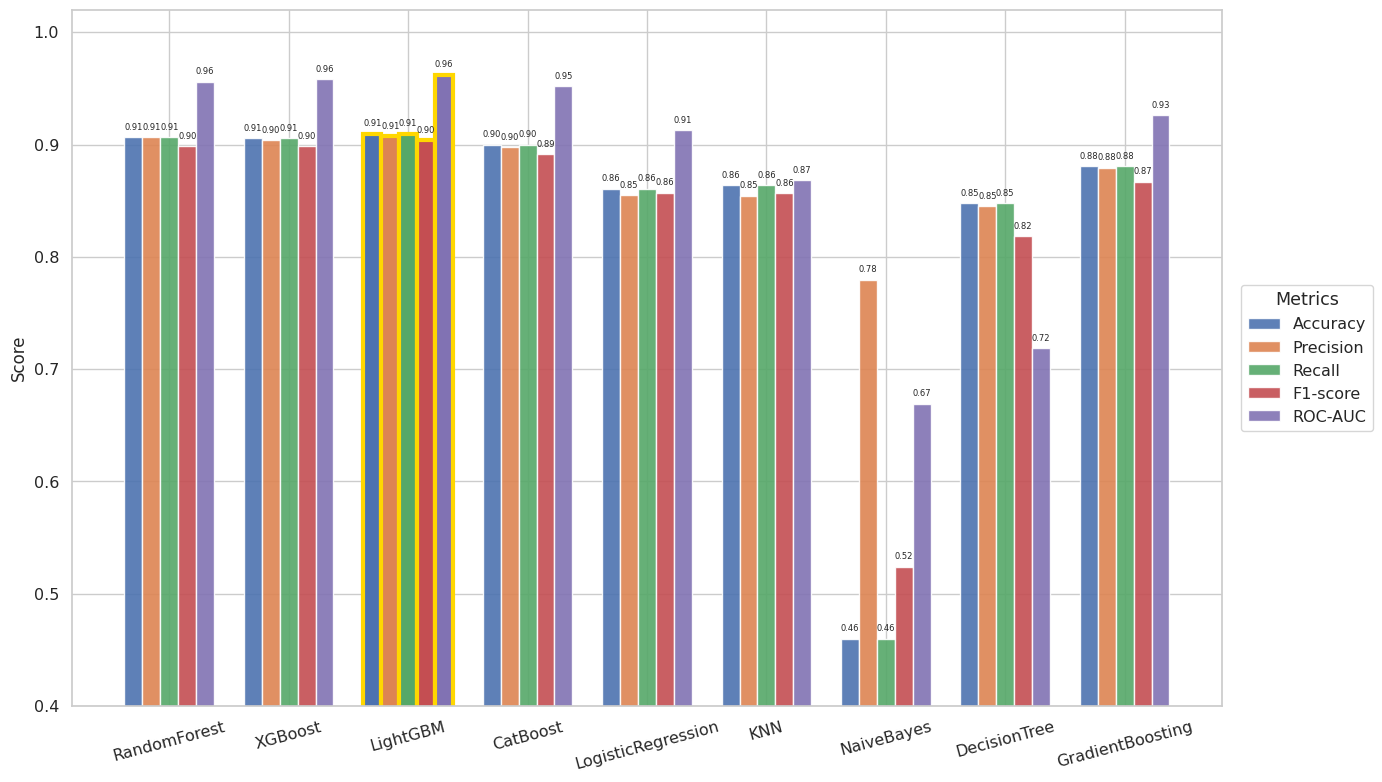

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Model results
data = {
    'Model': ['RandomForest', 'XGBoost', 'LightGBM', 'CatBoost', 'LogisticRegression',
              'KNN', 'NaiveBayes', 'DecisionTree', 'GradientBoosting'],
    'Accuracy': [0.9063, 0.9055, 0.9096, 0.8998, 0.8605, 0.8637, 0.4599, 0.8478, 0.8809],
    'Precision': [0.9067, 0.9040, 0.9073, 0.8978, 0.8547, 0.8543, 0.7794, 0.8451, 0.8795],
    'Recall': [0.9063, 0.9055, 0.9096, 0.8998, 0.8605, 0.8637, 0.4599, 0.8478, 0.8809],
    'F1-score': [0.8985, 0.8983, 0.9038, 0.8915, 0.8569, 0.8564, 0.5240, 0.8181, 0.8669],
    'ROC-AUC': [0.9560, 0.9584, 0.9623, 0.9522, 0.9127, 0.8682, 0.6690, 0.7186, 0.9259]
}
df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Find best model by average
df['Avg'] = df.mean(axis=1)
best_model = df['Avg'].idxmax()

# Plot setup
sns.set(style="whitegrid", font_scale=1.05)
colors = sns.color_palette("Spectral", n_colors=len(df))

fig, ax = plt.subplots(figsize=(14, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
bar_width = 0.15
x = np.arange(len(df.index))

# Plot bars
for i, metric in enumerate(metrics):
    values = df[metric].values
    bars = ax.bar(x + i * bar_width, values, width=bar_width, label=metric, alpha=0.9)
    for j, bar in enumerate(bars):
        if df.index[j] == best_model:
            bar.set_edgecolor('gold')
            bar.set_linewidth(3)
            bar.set_alpha(1)

# Add value labels
for i in range(len(metrics)):
    for j in range(len(df)):
        val = df.iloc[j, i]
        ax.text(j + i * bar_width, val + 0.005, f'{val:.2f}', ha='center', va='bottom', fontsize=6)

# Labels and layout
ax.set_xticks(x + bar_width * 2)
ax.set_xticklabels(df.index, rotation=15)
ax.set_ylabel("Score", fontsize=12)
ax.set_ylim(0.4, 1.02)

# Move legend outside
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Metrics')

plt.tight_layout()
plt.show()
